# Introduction to napari

napari is a n-dimensional image visualizer for the Python world. While it has been possible to visualize simple images (e.g. in Matlab) or even volumes (e.g [itkwidgets](https://github.com/InsightSoftwareConsortium/itkwidgets) in Python, napari is the first Python software providing the full expected palette of possibilities to visualize, analyze and interact with n-dimensional images. In particular it also implements a simple plugin mechanism to create graphical interfaces and to "record" actions of the user in the visualization window, making it very easy to create custom applications.

## Different usages

It is possible to use napari as a simple desktop application. It can be installed via an installer in most OSs and can be used simply via its graphical interface (like e.g. Fiji). napari however shines brightest when it is used in conjunction with some scripting that directly interacts with it. As this is a programming course, this is the path we are following here by importing napari, as any other module, into our notebook.

In [17]:
import napari

## The viewer

Before we can use napari, we have to create an instance of a ```Viewer```. The ```Viewer``` is the central element of napari and roughly corresponds to the napari GUI.

In [29]:
viewer = napari.Viewer()

Executing the above line creates an interface window *outside* the notebook. This is the main reason why napari cannot really be used remotely, as it always opens like a desktop application. To still be able to visualize the window in notebooks we use the following utility:

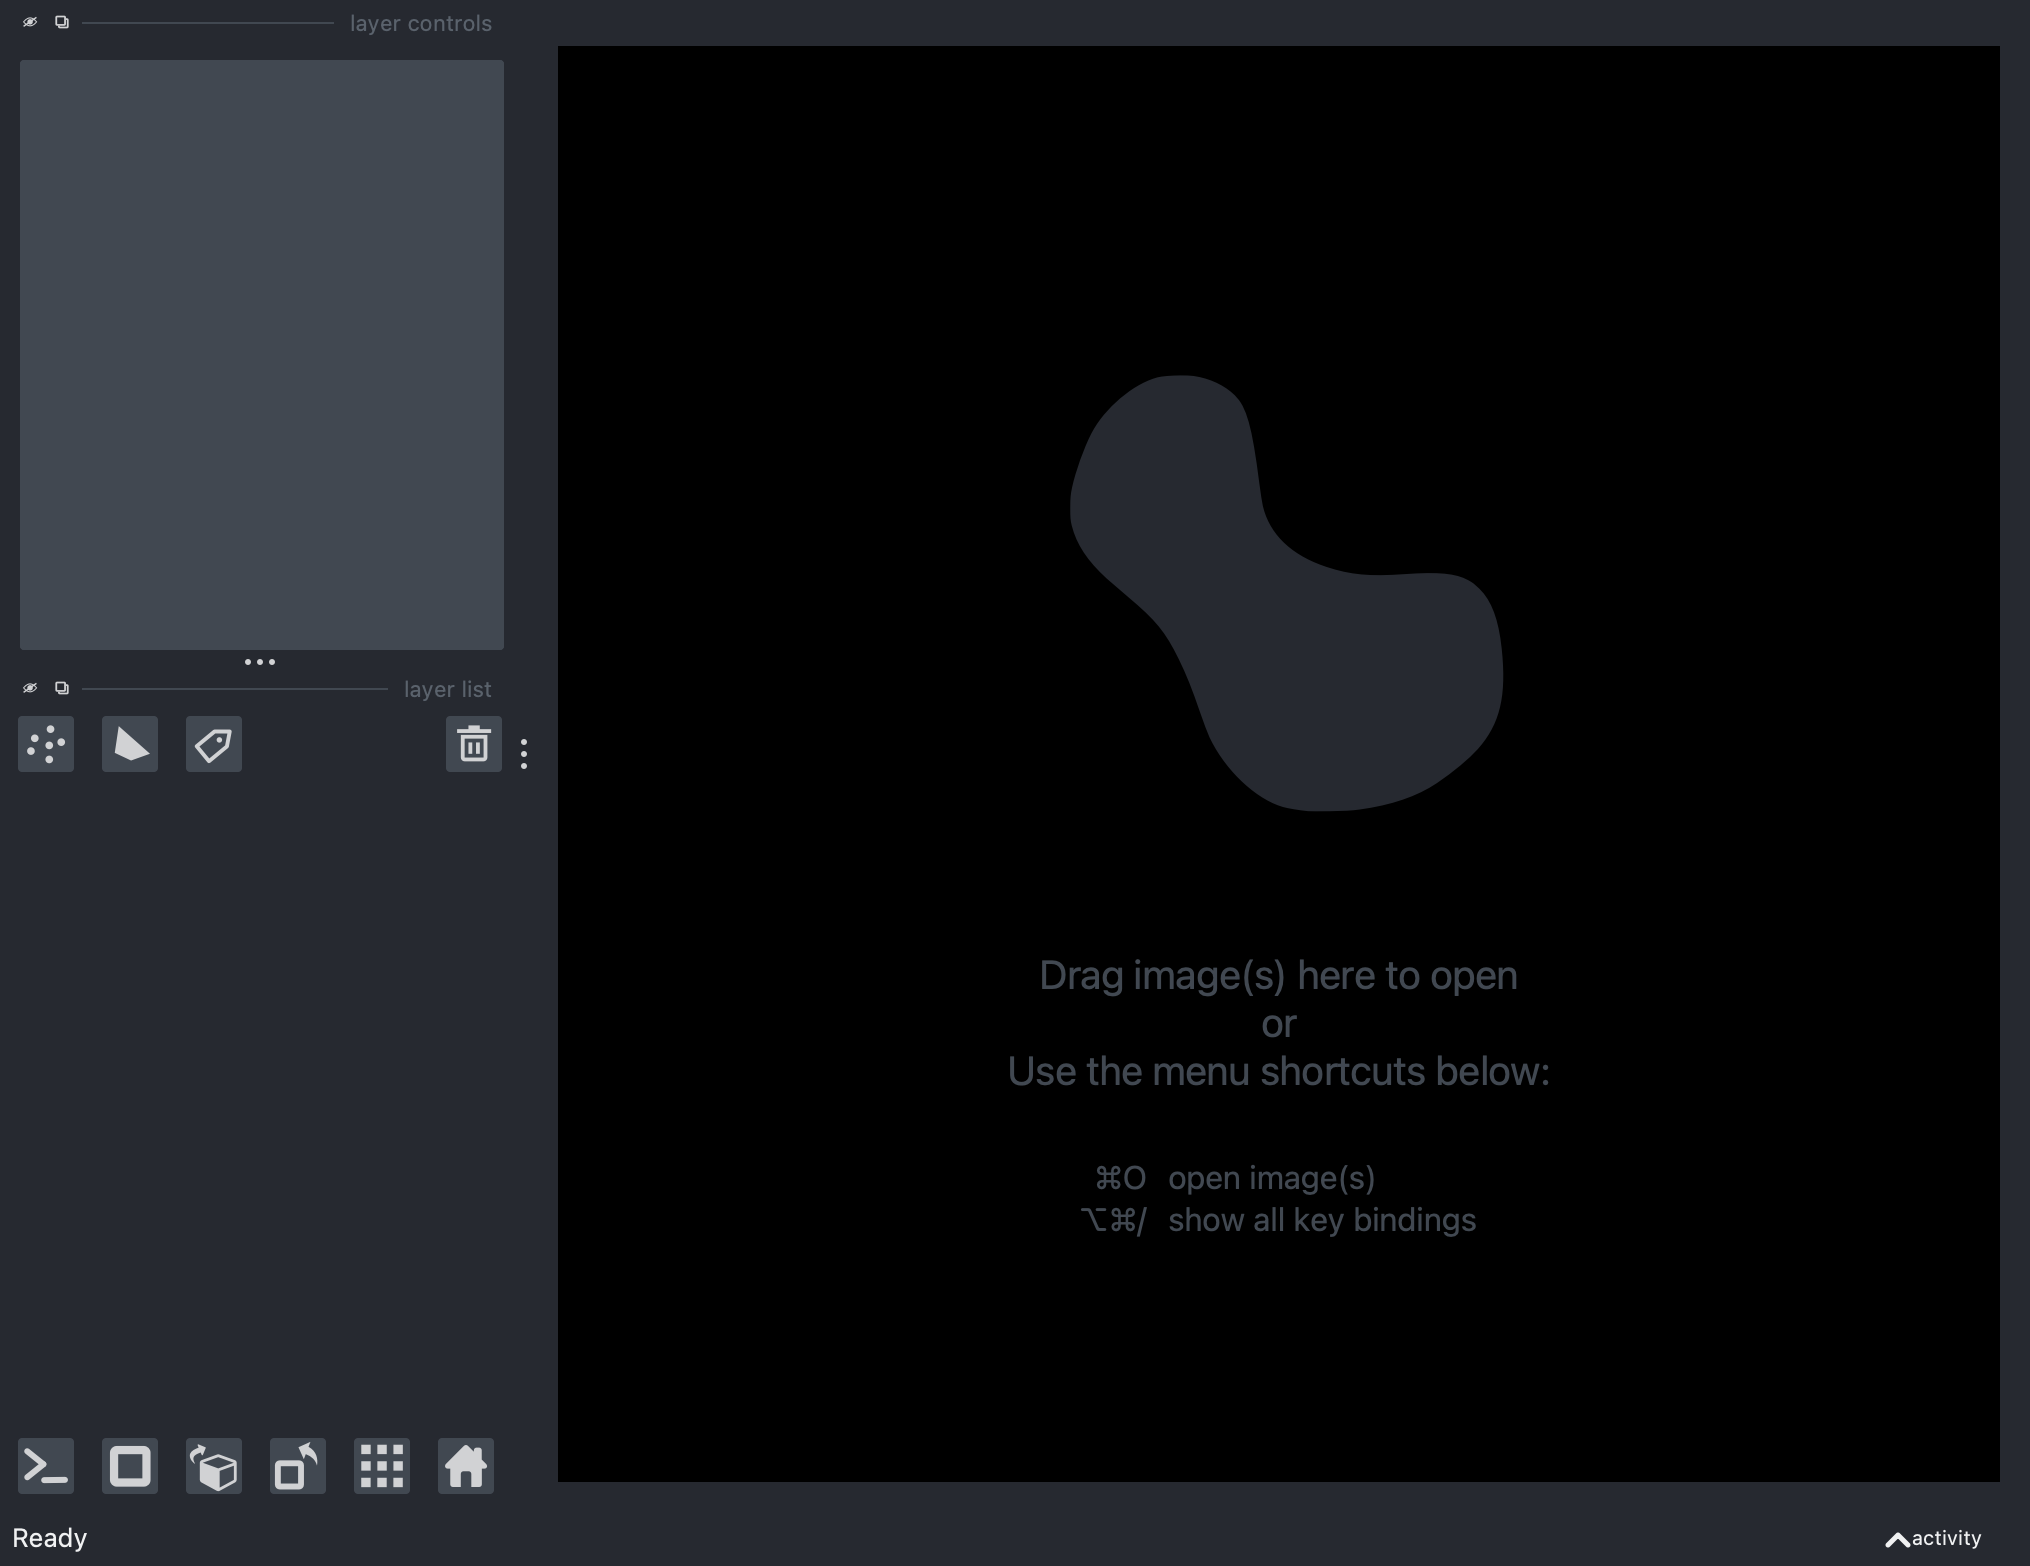

In [30]:
from napari.utils import nbscreenshot

nbscreenshot(viewer, alt_text='Initial window')

From that window, we can use the menu (not shown above) to interact with napari e.g. to load an image. As we created the ```Viewer``` inside the notebook, we can also play with ```viewer``` to programmatically open images and process them. We will see later how to add *any* image to the viewer. For the moment we use samples that ship directly with napari and that can be opened with the ```open_sample``` method:

In [31]:
viewer.open_sample(plugin='napari', sample='cells3d')

[<Image layer 'membrane' at 0x2b7d2a6a0>,
 <Image layer 'nuclei' at 0x2b128b220>]

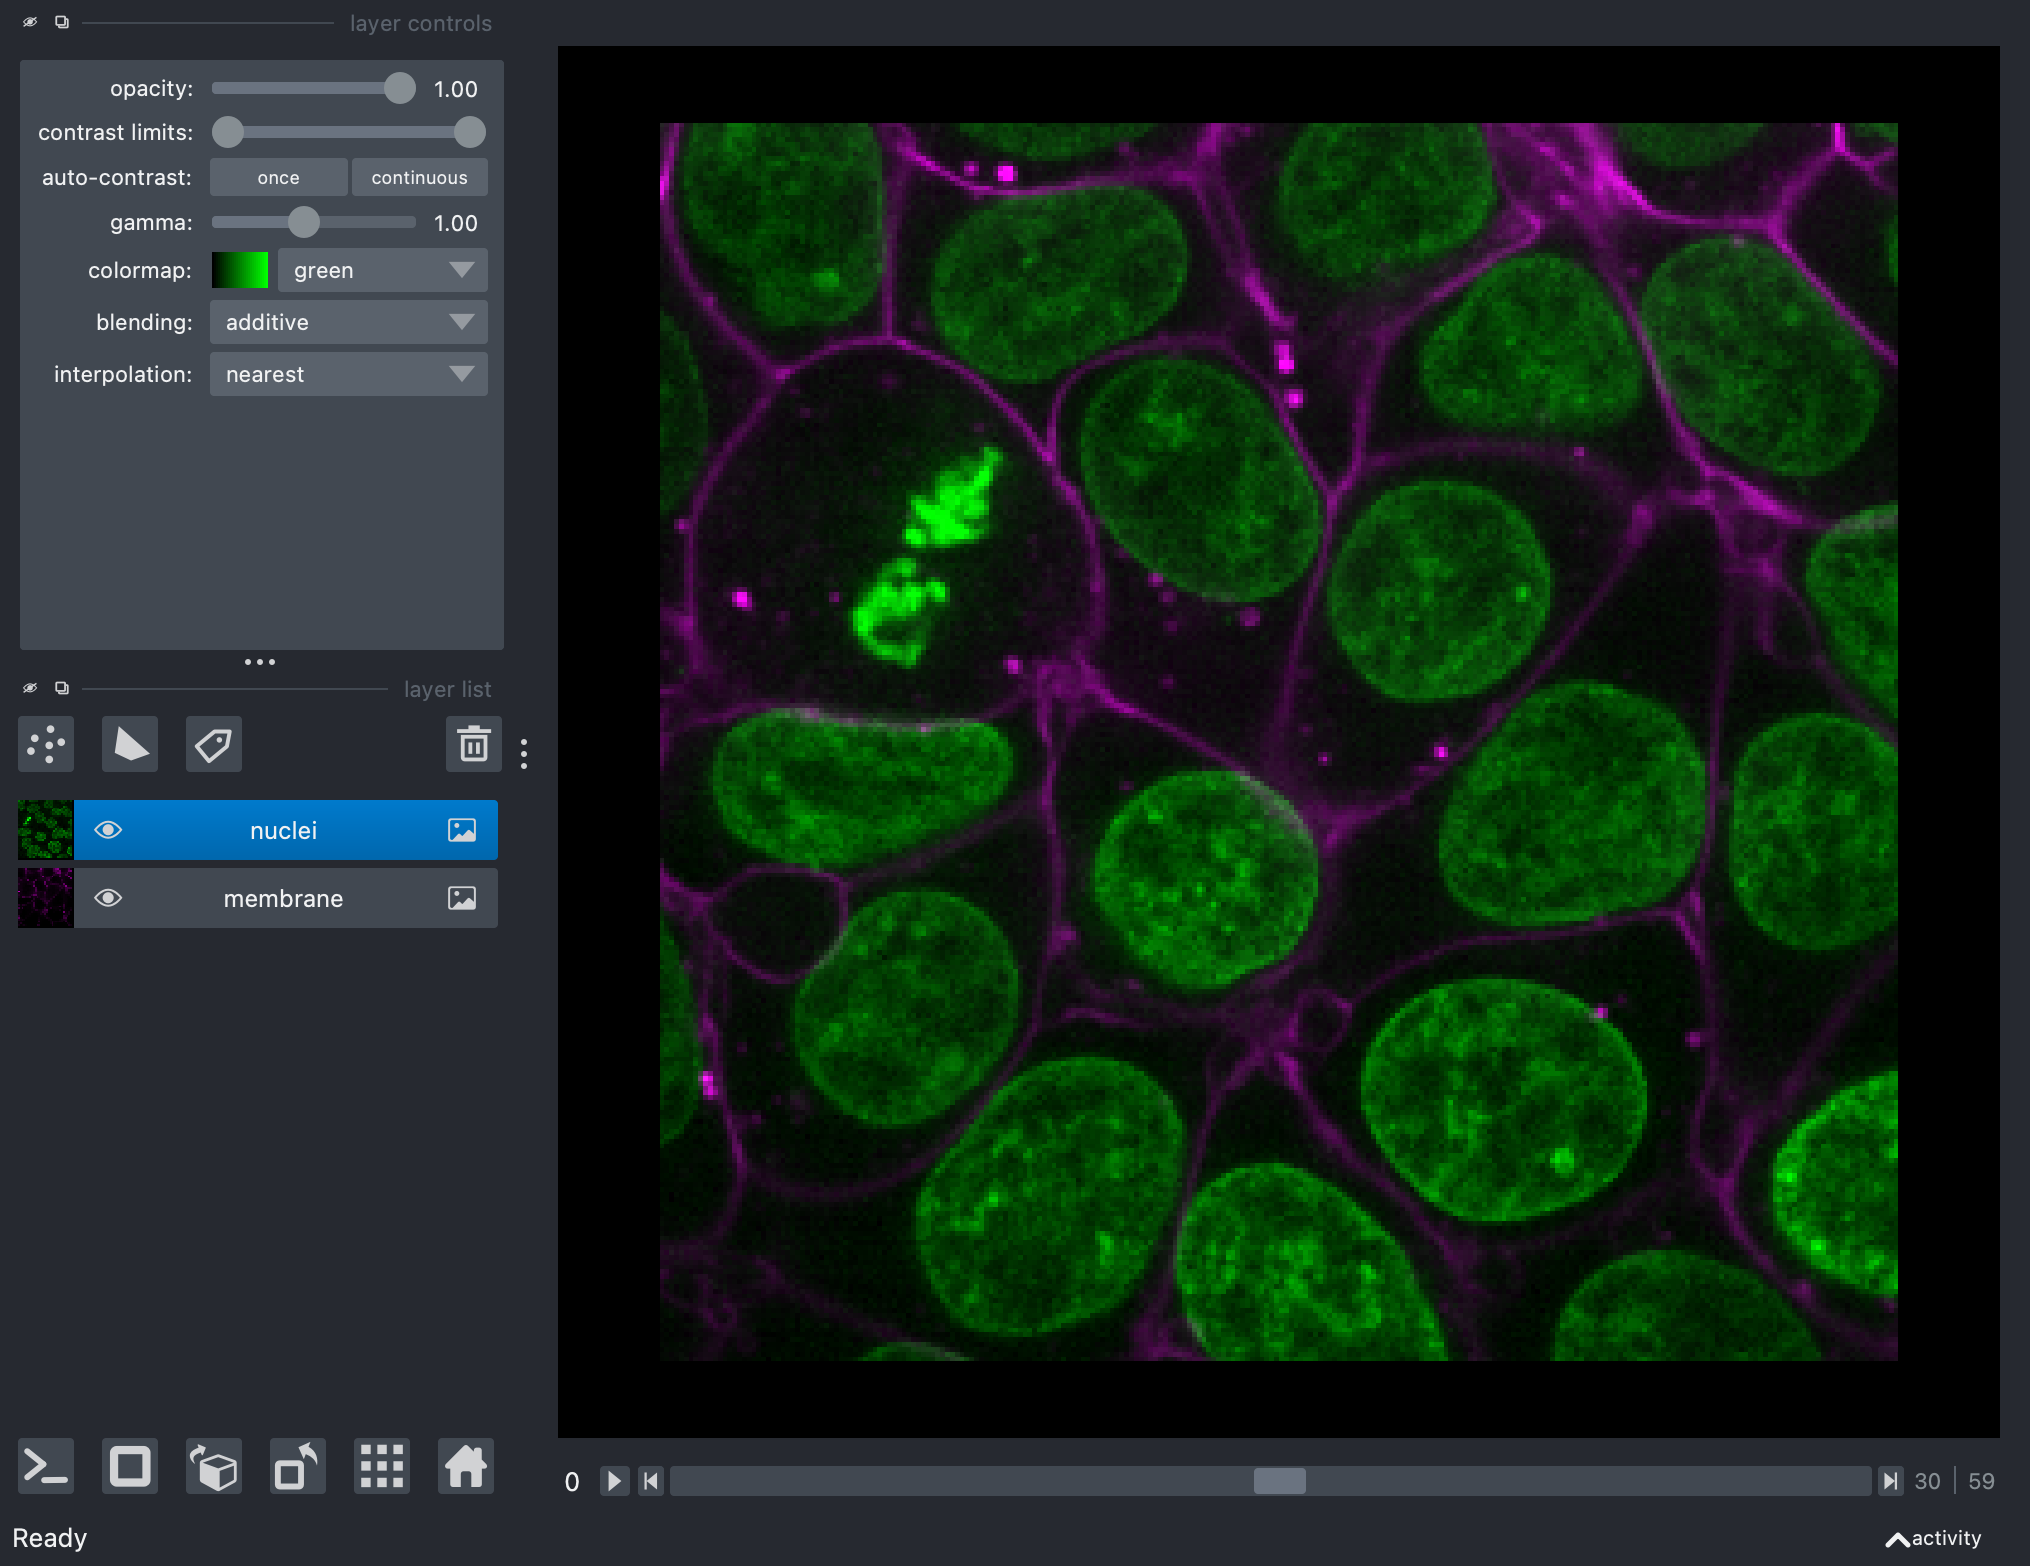

In [32]:
nbscreenshot(viewer, alt_text='Initial window')

## Elements of the viewer

In the above image we see the four essential elements of the napari interface:
1. **The viewer** itself which displays the image(s).
2. **The layer list**. Unlike Fiji which creates a new window for each new element (e.g. when you split channels of an image), napari adds all images to the same viewer but organises them into **layers**. In the UI You need to select the layer you want to work on and using the buttons you can also add layers of different types (more about those later).
3. **The layer controls** which allow to control the look of a layer (e.g. contrast) or interact with it (annotating regions).
4. **The bottom toolbar** which offers general options for the viewer rendering. For example to switch between 2D slice view and 3D volume view. At the bottom you also find the sliders to control the currently viewed z-plane/time-point/channel etc. of the data.

## The ```viewer``` object

The ```viewer``` object is the central variable that you are going to use when running napari from a notebook or an interactive console. Here we comment on some of the most important properties and methods of the ```viewer```:

- **Adding elements**. The ```viewer``` has a series of functions called ```add_xxx``` that allow you to add different types of content to the viewer. We have for example the ```add_image``` method allows us to add a regular nD image. We will explore these functions and their options in further detail in the next chapter.
- **Viewer state**: The ```dims``` properties gives us information about the dimensionality of the viewer: whether the viewer is in 2D/3D mode, what is the current position of sliders (if any exist) handling nD data:

In [35]:
viewer.dims

Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 60.0, 1.0), (0.0, 256.0, 1.0), (0.0, 256.0, 1.0)), current_step=(30, 128, 128), order=(0, 1, 2), axis_labels=('0', '1', '2'))

- **Layer list**: the ```layers``` property contains a list of layers corresponding to those displayed in the layer list of the UI. Each element is a layer object that contains all the information about the layer. It can be accessed either via indexing ```viewer.layers[0]``` or by name ```viewer.layers['membrane']```. One of he most important elements is for example the ```data``` property containing the Numpy array of the data:

In [37]:
viewer.layers

[<Image layer 'membrane' at 0x2b7d2a6a0>, <Image layer 'nuclei' at 0x2b128b220>]

In [40]:
viewer.layers['membrane'].data.shape

(60, 256, 256)

- **Screenshots**: the ```screenshot``` function allows you the currently displayed images including or excluding the viewer interface. Note that the image is **a regular RGB image** copying the viewer and not an actual stack of image containing the raw information. The RGB picture can be displayed with ```imshow```:

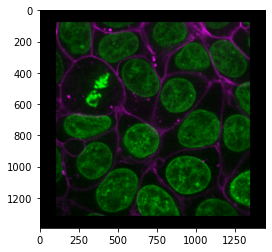

In [42]:
import matplotlib.pyplot as plt

screenshot = viewer.screenshot()
plt.imshow(screenshot);

- **Reset**: Finally if you heavily modified the view point of the viewer, and for example have lost your image (by moving or zooming out) you can still come back to the default view using the ```reset_view``` method:

In [45]:
viewer.reset_view()

## Exercise

Create a napari viewer and add to it the ```Kidney``` sample image. Explore the interface:
- remove layers
- change rendering to 3D
- change the colormaps
- reset the view